In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
def plot_heatmap(dataframe, 
                 title=False, 
                 savename=False, 
                 fmt='d', 
                 annot=True, 
                 cbar=True):
    matplotlib.rcParams.update({'font.size': 30})

    fig, ax = plt.subplots(figsize=(30,40), 
                           dpi=100)
    hmp = sns.heatmap(ax=ax,
                data=dataframe,
                square=True,
                annot=annot,
                fmt=fmt,
                annot_kws={"size":8},
                cbar=cbar, 
                cbar_kws=dict(use_gridspec=False,
                              location="top", 
                              shrink=1)
               )
    if title:
        plt.title(title, 
                  fontsize=40)
    if savename:
        plt.savefig(savename, 
                    bbox_inches='tight')
    plt.show()

def sort_df(dataframe):
    cols = []
    for num in range(8,38):
        cols.append('515rcbc'+str(num))
    dataframe = dataframe.reindex(reversed(cols))
    return dataframe[cols]

def plot_bar(dataframe, 
             metric, 
             title=False, 
             savename=False, 
             dpi=100, 
             ylabel=False, 
             xlabel=False):
    matplotlib.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(8,4))
    dataframe = dataframe.sort_values(metric, 
                                      axis=0)
    plt.bar(dataframe.index, 
            dataframe[metric], 
            color='purple', 
            width=0.8)
    plt.xticks(rotation=45, 
               ha='right', 
               fontsize=14)
    plt.ylabel(metric, 
               fontsize=14)
    plt.xlim(0.4, 
             len(dataframe.index)-0.4)
    ax.grid(axis='y')
    ax.set_axisbelow(True)
    if title:
        plt.title(title, 
                  fontsize=18)
    if xlabel:
        plt.xlabel(xlabel, 
                   fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, 
                   fontsize=14)
    if savename:
        plt.savefig(savename, 
                    dpi=dpi, 
                    bbox_inches='tight')

    plt.show()


In [ ]:
!shared_phylotypes.py -i otu_table.biom -o shared_phylo.tsv

In [5]:
phylo = pd.read_csv('./shared_phylo.tsv', 
                    sep='\t', 
                    index_col=0)
phylo = sort_df(phylo)

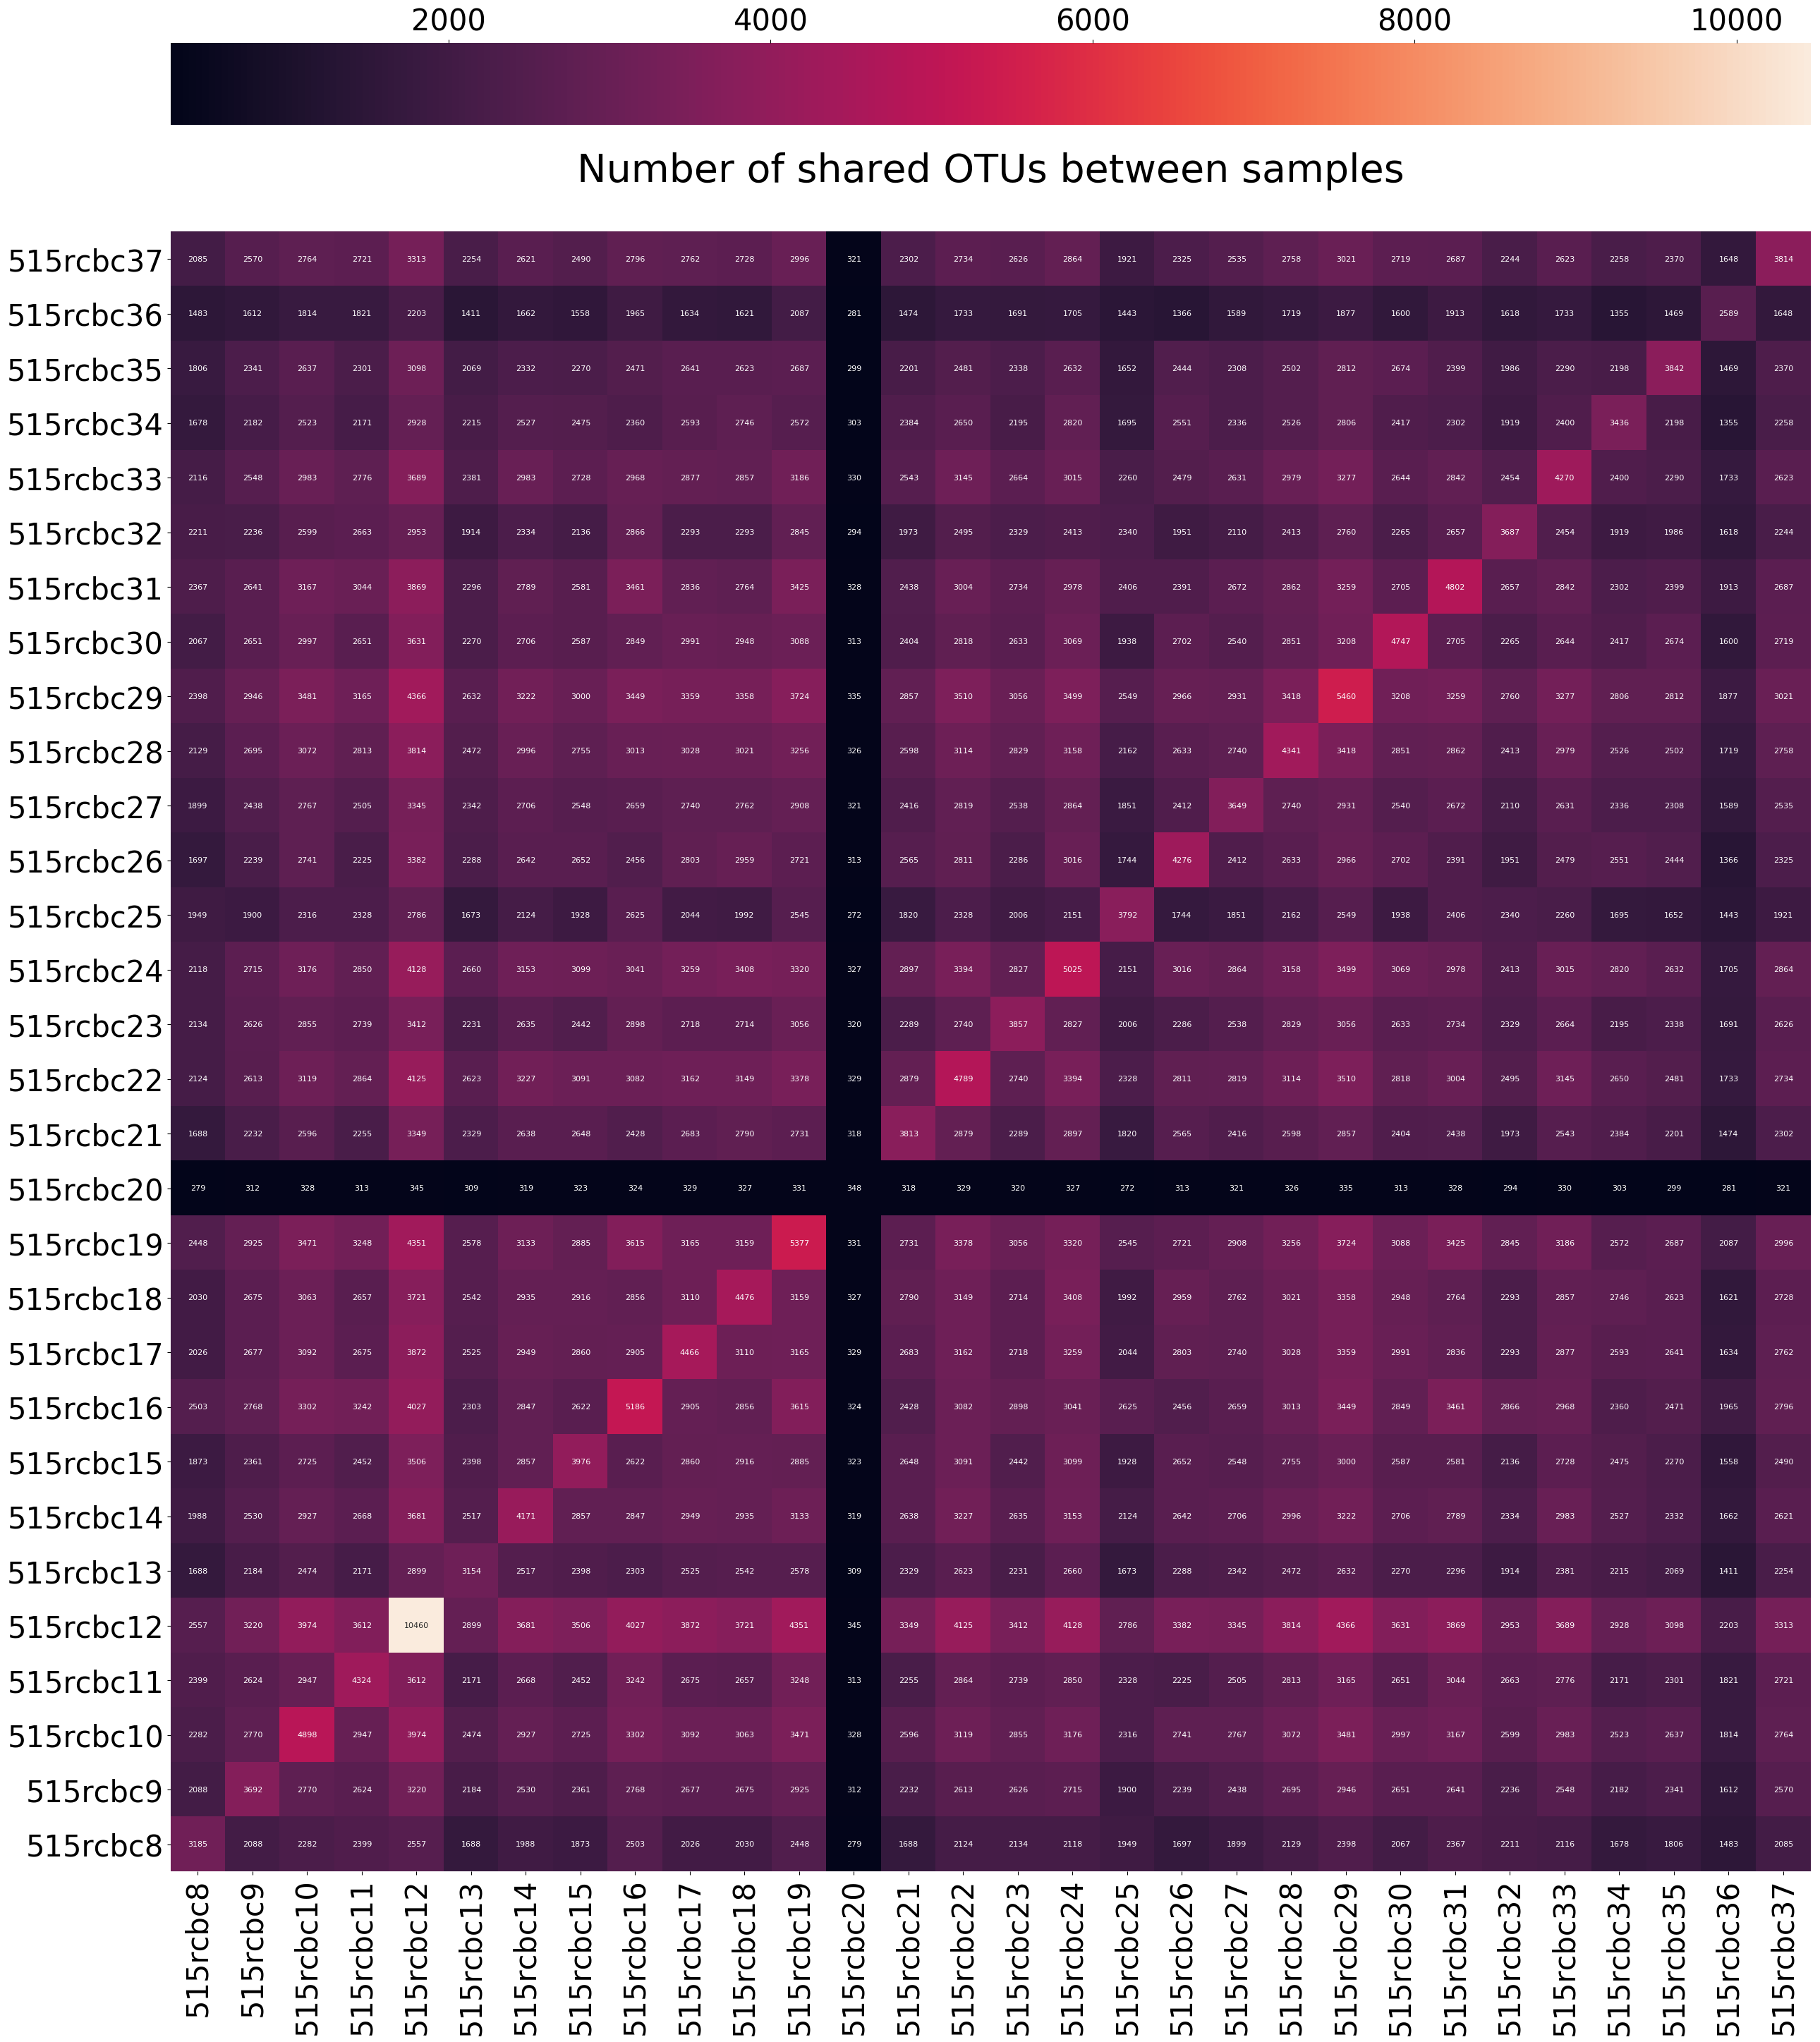

In [6]:
plot_heatmap(phylo, 
             title="Number of shared OTUs between samples\n", 
             savename='./figs/shared_otus.png')

In [ ]:
!alpha_diversity.py \
-i otu_table.biom \
-o alphadiv.tsv \
-t rep_set.tre

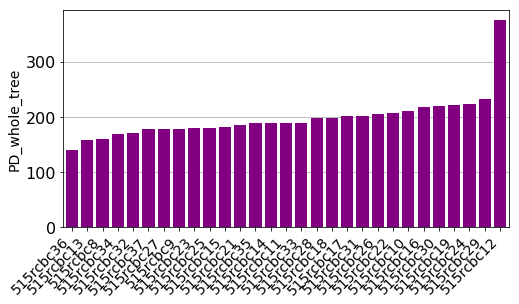

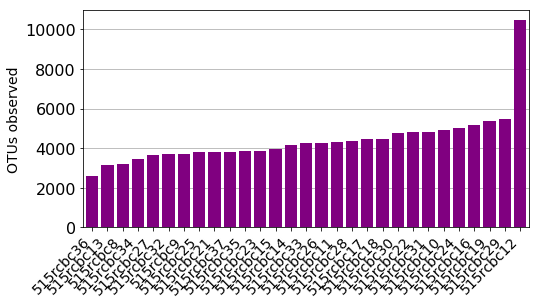

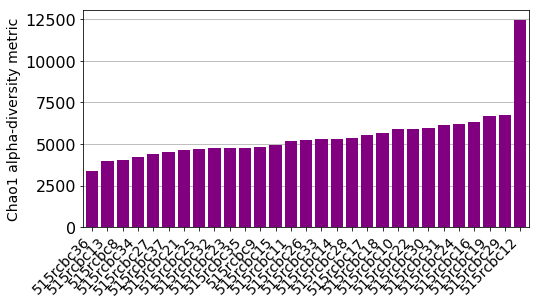

In [7]:
alpha = pd.read_csv('./alphadiv.tsv', 
                    sep='\t', 
                    index_col=0)
alpha = alpha.sort_index()
plot_bar(alpha, 
         'PD_whole_tree', 
         savename='./figs/PD_alpha.png')
plot_bar(alpha, 
         'observed_otus', 
         savename='./figs/observed_alpha.png', 
         ylabel='OTUs observed')
plot_bar(alpha, 
         'chao1', 
         savename='./figs/chao1_alpha.png', 
         ylabel="Chao1 alpha-diversity metric", 
         dpi=300)

In [8]:
mn = alpha[['chao1']].T
print("Chao1")
mn.drop(['515rcbc20','515rcbc12'], 
        axis=1, 
        inplace=True)
print('Alpha diversity standard deviation, no outliers')
print(round(mn.std(axis=1).values[0],0))
print('Alpha diversity mean, no outliers')
print(round(mn.mean(axis=1).values[0],0))

Chao1
Alpha diversity standard deviation, no outliers
843.0
Alpha diversity mean, no outliers
5189.0


In [ ]:
!beta_diversity.py \
-i otu_table.biom \
-o beta_diversity \
-m unweighted_unifrac,weighted_unifrac,euclidean \
-t rep_set.tre

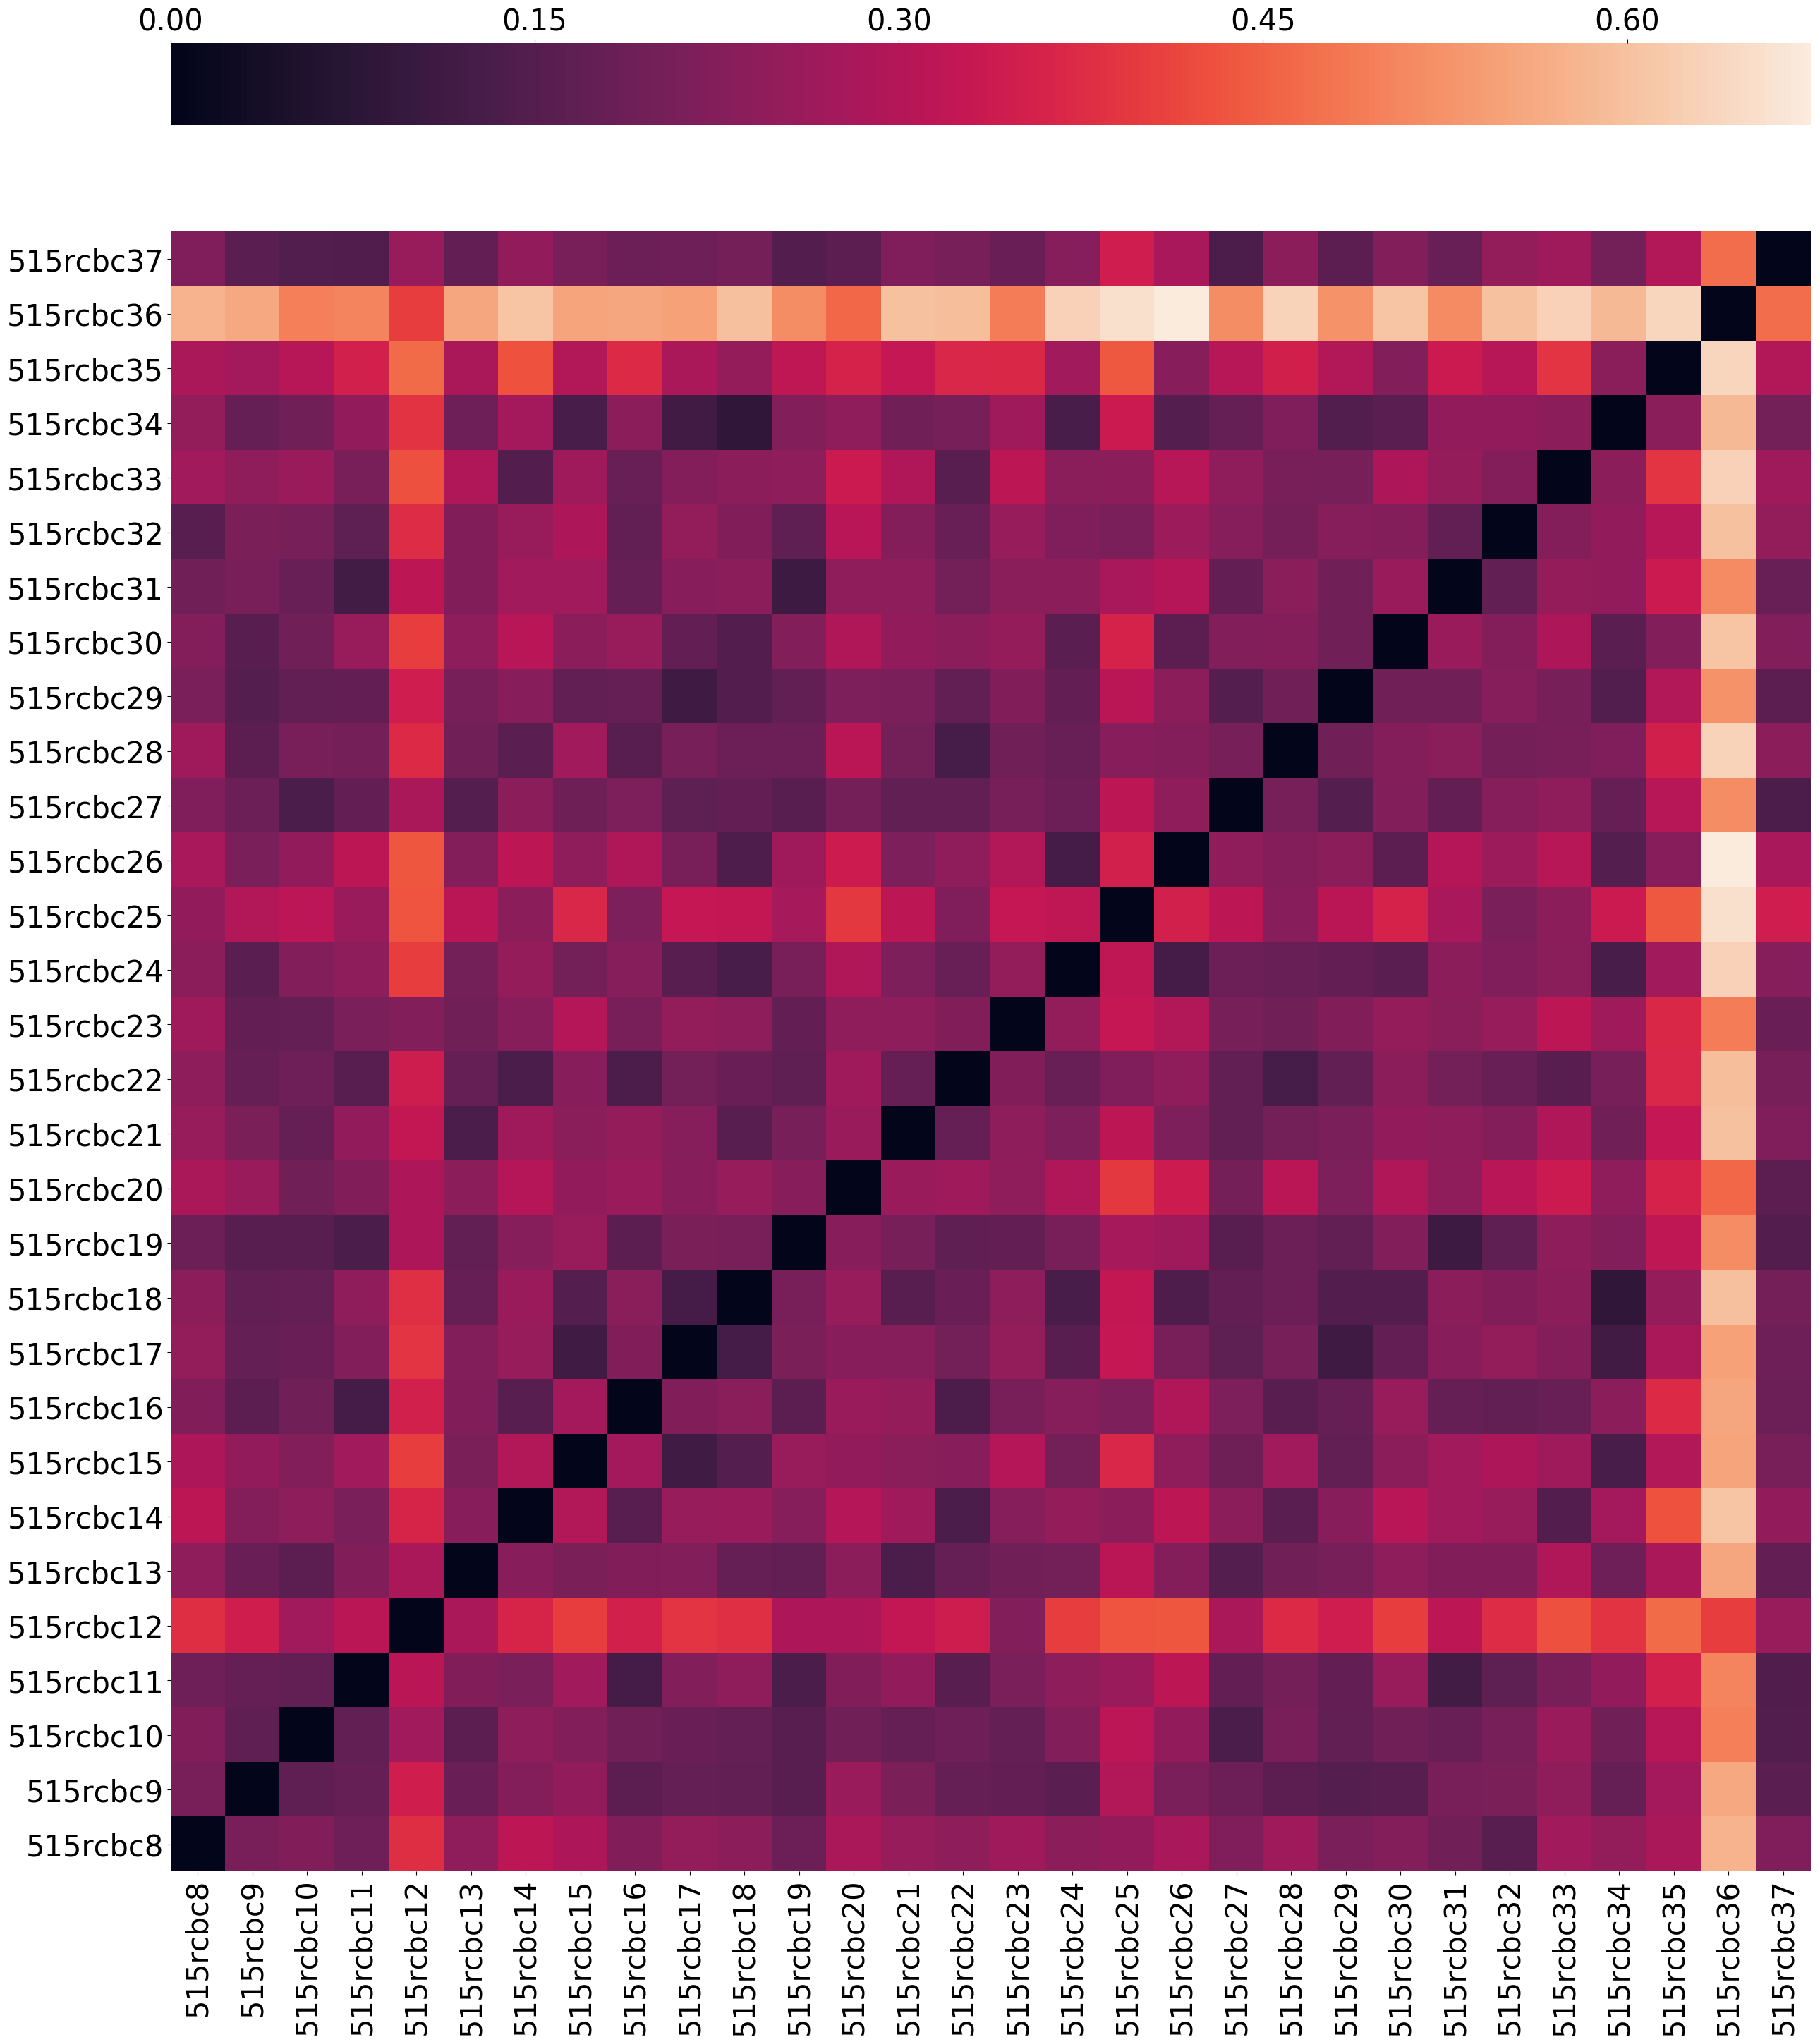

In [9]:
beta_unweight = pd.read_csv('./beta_diversity/weighted_unifrac_otu_table.txt', 
                            sep='\t', 
                            index_col=0)
beta_unweight = sort_df(beta_unweight)
plot_heatmap(beta_unweight, 
             fmt='.4f', 
             savename='./figs/unweighted_beta.png', 
             cbar=True, 
             annot=False)

In [10]:
bet = beta_unweight.mean()
print("Unweighted unifrac")
print("Beta diversity standard deviation")
print(round(bet.drop('515rcbc36').std(),4))
print("Beta diversity mean")
print(round(bet.drop('515rcbc36').mean(),4))

Unweighted unifrac
Beta diversity standard deviation
0.0357
Beta diversity mean
0.2369


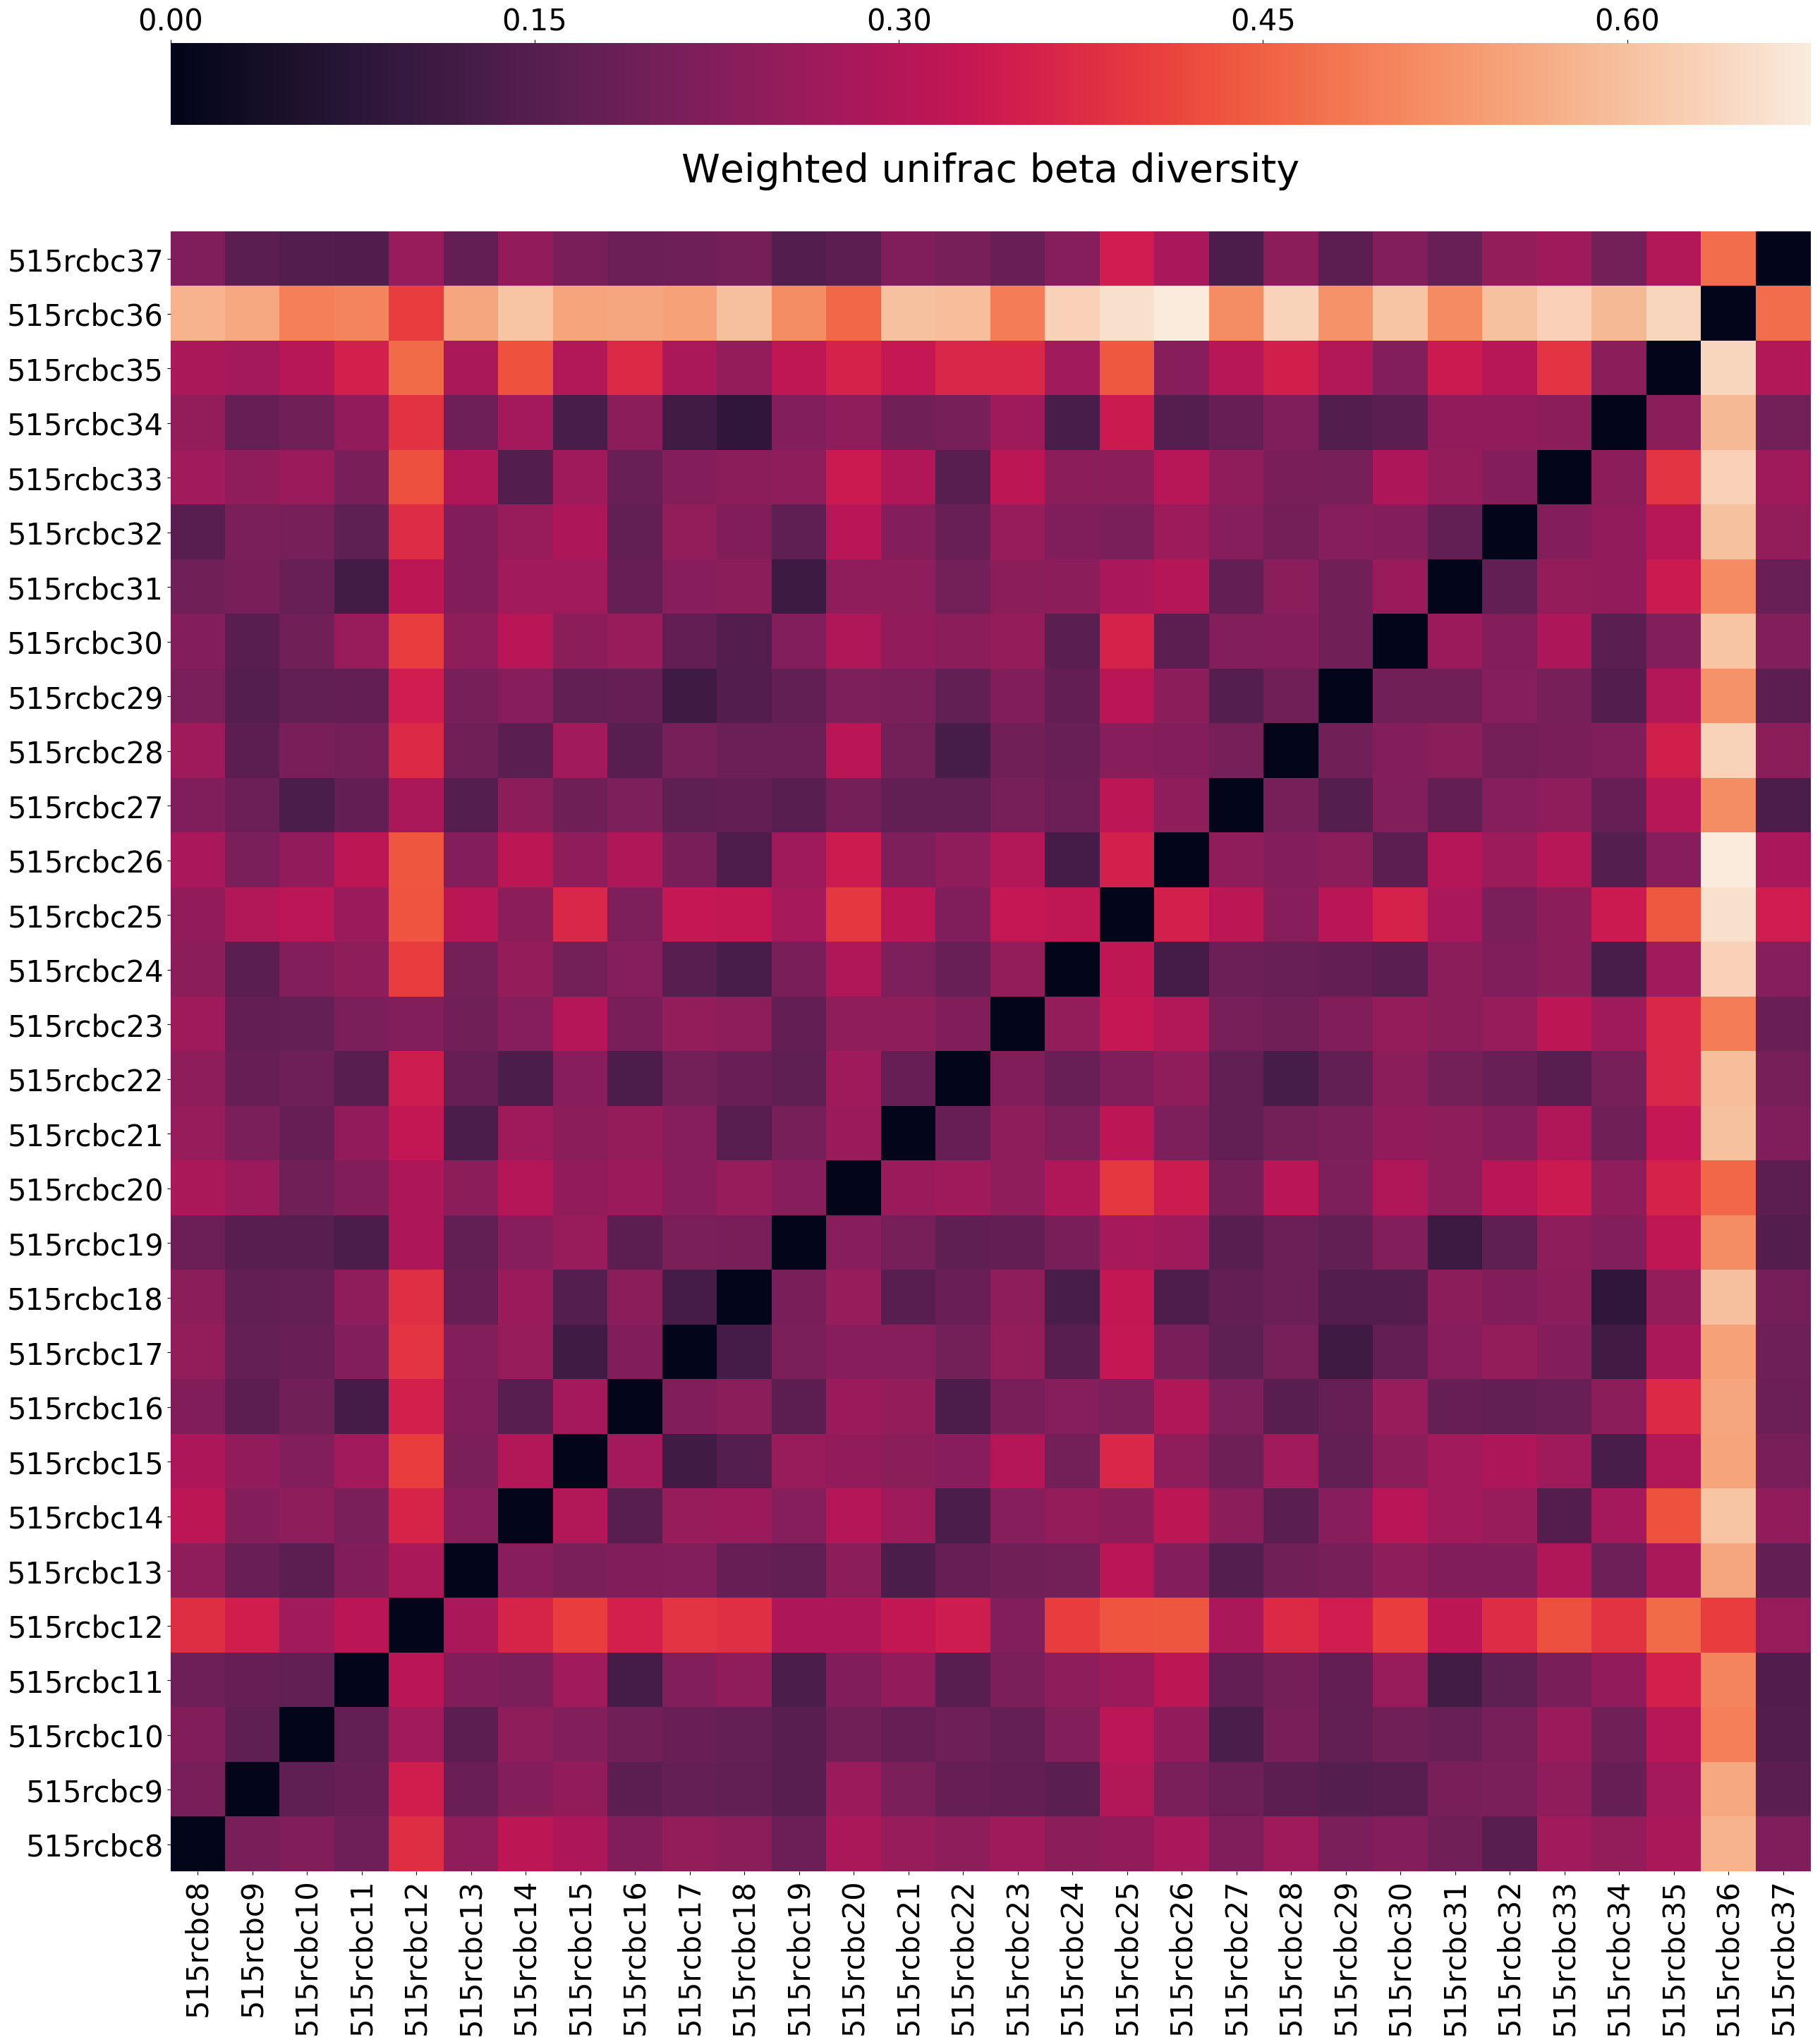

In [11]:
beta = pd.read_csv('./beta_diversity/weighted_unifrac_otu_table.txt', sep='\t', index_col=0)
beta = sort_df(beta)
plot_heatmap(beta, 
             fmt='.4f', 
             title='Weighted unifrac beta diversity\n', 
             savename='./figs/weighted_beta.png', 
             cbar=True,
            annot=False)

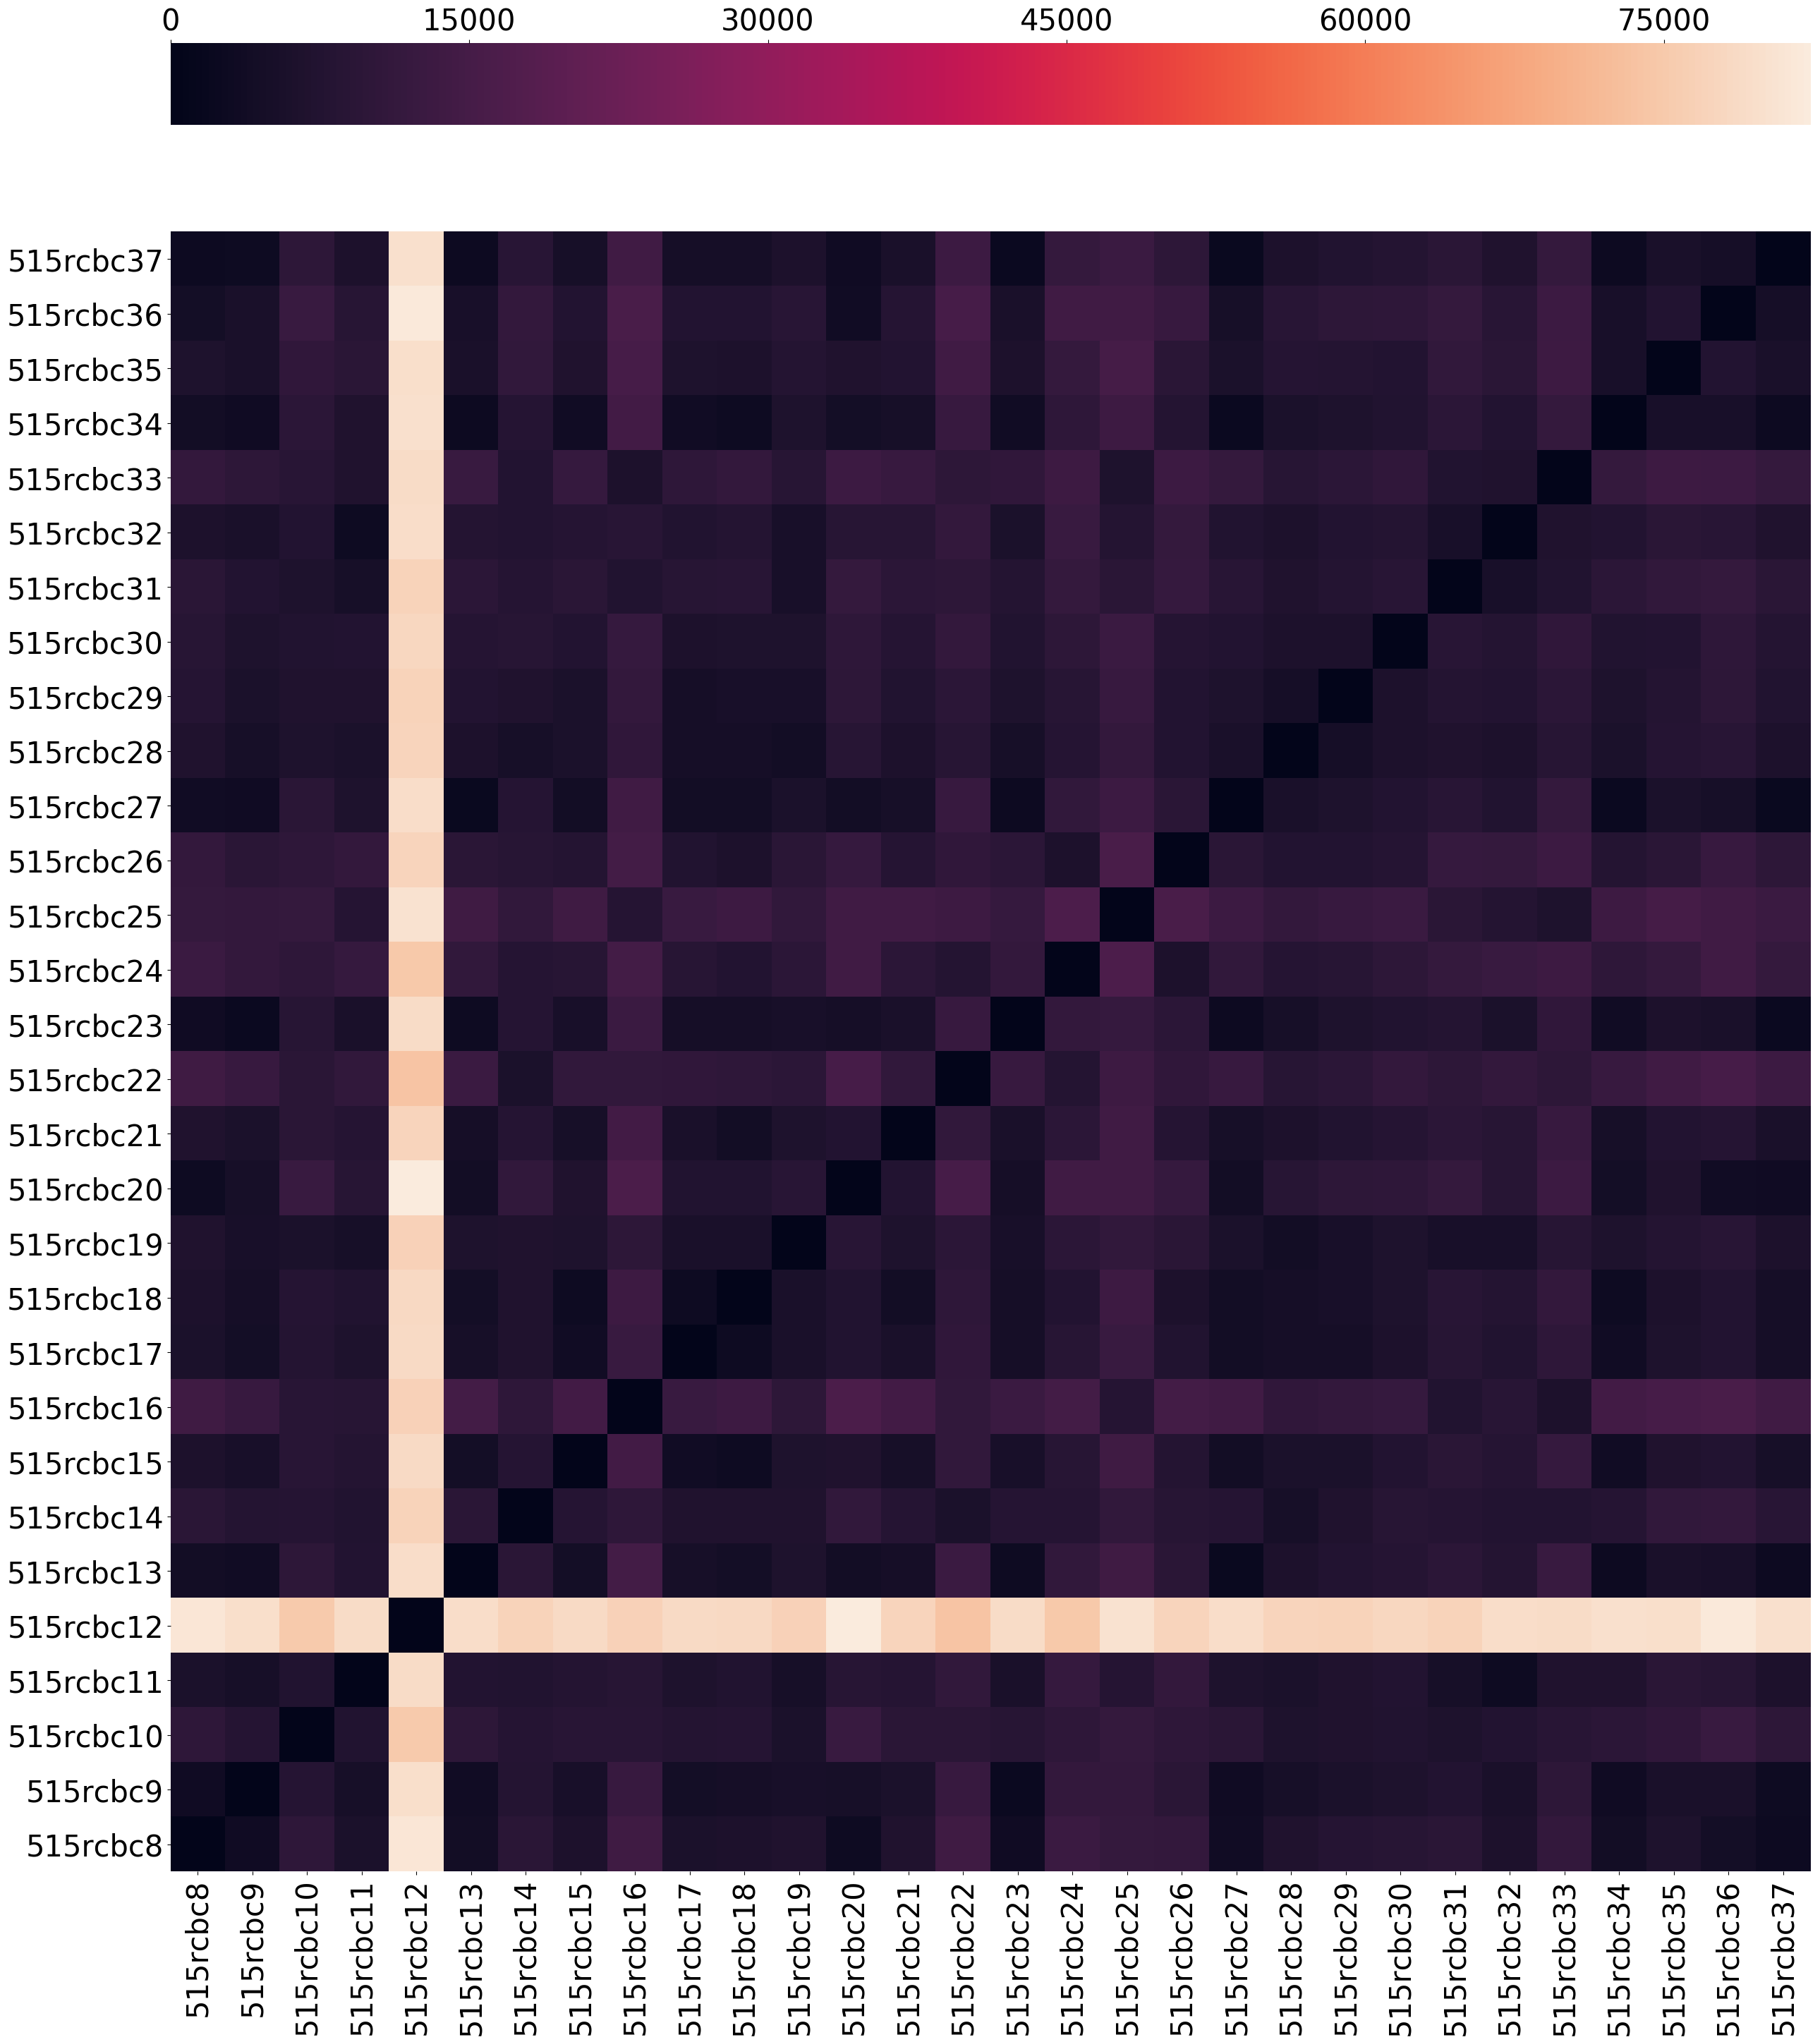

In [12]:
eucl = pd.read_csv('./beta_diversity/euclidean_otu_table.txt', sep='\t', index_col=0)
eucl = sort_df(eucl)
plot_heatmap(eucl, 
             fmt='.2f', 
             savename='./figs/eucl_beta.png',\
            annot=False)

In [ ]:
!observation_metadata_correlation.py \
-i otu_table.biom \
-o ./metadata_correlation/metadata_correlation_ph_pearson.tsv \
-m map.tsv \
-c SamplePh \
-s pearson
!observation_metadata_correlation.py \
-i otu_table.biom \
-o ./metadata_correlation/metadata_correlation_ph_spearman.tsv \
-m map.tsv \
-c SamplePh \
-s spearman
!observation_metadata_correlation.py \
-i otu_table.biom \
-o ./metadata_correlation/metadata_correlation_ph_kendall.tsv \
-m map.tsv \
-c SamplePh \
-s kendall

In [13]:
pears = pd.read_csv('./metadata_correlation/metadata_correlation_ph_pearson.tsv', 
                    sep='\t', 
                    index_col=0)
spear = pd.read_csv('./metadata_correlation/metadata_correlation_ph_spearman.tsv', 
                    sep='\t', 
                    index_col=0)
kend = pd.read_csv('./metadata_correlation/metadata_correlation_ph_kendall.tsv', 
                   sep='\t', 
                   index_col=0)
taxon = pears.taxonomy
pears.columns = pears.columns + '_pears'
spear.columns = spear.columns + '_spear'
kend.columns = kend.columns + '_kend'
correl = pd.concat([pears,spear,kend], axis=1)
correl = correl[correl.columns.drop(list(correl.filter(regex='taxonomy')))]
correl = pd.concat([correl, taxon], axis=1)
correl['pval_mean'] = correl[['pval_pears', 'pval_spear','pval_kend']].mean(axis=1)
correl['pval_fdr_mean'] = correl[['pval_fdr_pears', 'pval_fdr_spear','pval_fdr_kend']].mean(axis=1)
correl['pval_bon_mean'] = correl[['pval_bon_pears', 'pval_bon_spear','pval_bon_kend']].mean(axis=1)
correl['test_stat_mean'] = correl[['Test stat._pears','Test stat._spear','Test stat._kend']].mean(axis=1)
correl[['pval_mean', 'pval_fdr_mean', 'pval_bon_mean', 'test_stat_mean']].sort_values('pval_mean')

,pval_mean,pval_fdr_mean,pval_bon_mean,test_stat_mean
HM187283.1.1511,0.001630,0.866988,1.0,0.561134
KY190578.1.1416,0.004708,0.866988,1.0,0.514640
FPLL01004497.15.1491,0.006157,0.866988,1.0,0.497394
AF293012.1.1505,0.007717,0.866988,1.0,0.497955
MEVL01000015.4457.6018,0.008646,0.866988,1.0,0.519669
HQ190564.1.1509,0.009696,0.866988,1.0,0.469748
EU335205.1.1524,0.010136,0.866988,1.0,0.481878
EU135415.1.1315,0.011417,0.866988,1.0,0.470892
JQ428743.1.1452,0.012031,0.866988,1.0,0.475895
EF559008.1.1441,0.013022,0.866988,1.0,0.449430


In [14]:
mapping = pd.read_csv('./map.tsv', sep='\t', index_col=0)
mapping.replace({'Trace':1,
                 'Trace-Low':3,
                 'Low': 10,
                 'Low-Medium':31,
                 'Medium': 100,
                 'Medium-High':310,
                 'High': 1000}, 
                inplace=True)
mapping.to_csv('./exponential_map.tsv', sep='\t')
mapping

,BarcodeSequence,LinkerPrimerSequence,SampleType,Year,Month,Day,SampleLongitude,SampleLatitude,SampleSiteDescription,SampleDepth,SampleFootFall,SampleVegetation,SampleWeatherTemp,SampleMoisture,SampleDescription,SamplePh,SamplePotassium,SampleNitrogen,SamplePhosphorus,Description
#SampleID,,,,,,,,,,,,,,,,,,,,
515rcbc8,GACTCAACCAGT,GTGYCAGCMGCCGCGGTAA,soil,2017,10,17,51.524800,-0.131000,"no grass, close to a tree, some roots were gro...",12.5,none,none,15,dry,Very dry and powder like. There were a few sto...,5.0,100,1,1000,team1
515rcbc9,GCCTCTACGTCG,GTGYCAGCMGCCGCGGTAA,soil,2017,10,17,51.524770,-0.131220,"sample taken between two trees, leaves on grou...",10.0,none,none,15,dry,"dry, stony, crumbly, hard",5.6,1,1,10,team2
515rcbc10,ACTACTGAGGAT,GTGYCAGCMGCCGCGGTAA,soil,2017,10,17,51.524114,-0.131286,"Underneath a log. Many woodlice, millipedes, s...",10.0,none,none,15,dry,"Fairly compact. Mostly soil, few small rocks. ...",9.0,1,100,100,team3
515rcbc11,AATTCACCTCCT,GTGYCAGCMGCCGCGGTAA,soil,2017,10,17,51.524500,-0.131600,"shrubs, away from footpaths; three nearby plan...",9.5,none,shrubs,14,moist,"heavy - sticks together and difficult to dig, ...",5.0,1,10,1000,team4
515rcbc12,CGTATAAATGCG,GTGYCAGCMGCCGCGGTAA,soil,2017,10,17,51.535722,-0.159251,"Regents canal, around 1m away from the water. ...",3.0,none,none,14,moist,"Dark brown colour, solid, probably contains clay",5.5,100,1,100,team5
515rcbc13,ATGCTGCAACAC,GTGYCAGCMGCCGCGGTAA,soil,2017,10,17,51.524530,-0.131230,"1m away from the footpath, 5m away from a tree",11.5,none,grass,15,moist,"Dark, moist, semi-compact soil. Small rocks. R...",5.5,10,10,100,team6
515rcbc14,ACTCGCTCGCTG,GTGYCAGCMGCCGCGGTAA,soil,2017,10,17,51.524610,-0.131030,"Approx. 2.5m from footpath and 10m from road, ...",10.5,none,grass,15,dry,"Crumbly, dry, coarse, mostly soil and a few sm...",5.5,1,1,10,team7
515rcbc15,TTCCTTAGTAGT,GTGYCAGCMGCCGCGGTAA,soil,2017,10,17,51.524400,-0.130900,"Open field, over 2 metres from foot paths, tre...",7.0,none,grass,14,moist,Medium loam,5.0,100,1,100,team8
515rcbc16,CGTCCGTATGAA,GTGYCAGCMGCCGCGGTAA,soil,2017,10,17,51.524570,-0.130640,1m from a big tree next to a bench,15.0,none,shrubs,14,moist,"dark brown, fine with some pebbles.",5.5,1,1,10,team9


In [10]:
%%bash
echo "ANOSIM comparison of categories" > categories.txt
for f in Ph Potassium Nitrogen Phosphorus; do
compare_categories.py \
--method anosim \
-i ./beta_diversity/unweighted_unifrac_otu_table.txt \
-m exponential_map.tsv \
-c Sample$f \
-o categories
echo "" >> ./categories.txt
echo $f >> ./categories.txt
cat ./categories/anosim_results.txt >> ./categories.txt
done
rm -r ./categories/
cat categories.txt

ANOSIM comparison of categories

Ph
method name	ANOSIM
test statistic name	R
sample size	30
number of groups	8
test statistic	-0.10911111111111106
p-value	0.85299999999999998
number of permutations	999

Potassium
method name	ANOSIM
test statistic name	R
sample size	30
number of groups	5
test statistic	0.2236809876059373
p-value	0.032000000000000001
number of permutations	999

Nitrogen
method name	ANOSIM
test statistic name	R
sample size	30
number of groups	6
test statistic	0.12027173913043475
p-value	0.11799999999999999
number of permutations	999

Phosphorus
method name	ANOSIM
test statistic name	R
sample size	30
number of groups	6
test statistic	0.2006074560329201
p-value	0.049000000000000002
number of permutations	999
